In [ ]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt


ndim = 2
nwalkers = 100
burnin = 100                      # Number of burn-in steps
nsteps = 500                           # Number of steps
dev = 4.2                         # Set dev value for the proposal PDF
samples = np.empty((nwalkers, ndim, nsteps))
samples[:, :, 0] = random.normal(0, dev, (nwalkers, ndim))   # Set the initial points

for j in range(nsteps):
    for i in range(nwalkers):
        thetap1 = samples[i, 0, j] + random.normal(0,dev)        # Propose new points
        thetap2 = samples[i, 1, j] + random.normal(0,dev)
        alpha = P(thetap1, thetap2)/P(theta1, theta2)     # Accept or reject
        if alpha>random.uniform() :
            theta1 = thetap1
            theta2 = thetap2
        samples[i, 0, j] = theta1          # Store points
        samples[i, 1, j] = theta2


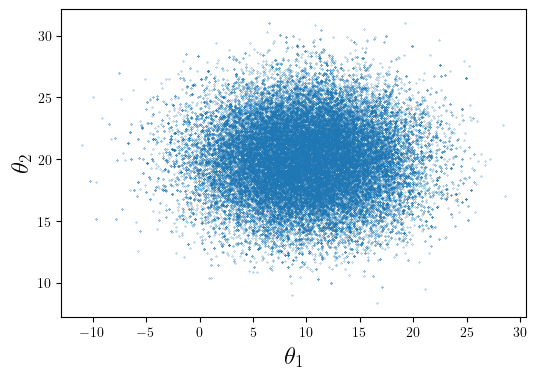

0.512


In [8]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt


def P(x1, x2):
    return np.exp(-(x1-10)**2/50-(x2-20)**2/18)


ndim = 2
burnin = 10000                      # Number of burn-in steps
nsteps = 50000                           # Number of steps
dev = 4.2                         # Set dev value for the proposal PDF
samples = np.empty((ndim, nsteps))    # Initialise samples array
theta1, theta2 = random.normal(0, dev, 2)   # Set the initial points


# Burn-in "for" loop

for i in range(burnin):
    thetap1 = theta1 + random.normal(0,dev)        # Propose new points
    thetap2 = theta2 + random.normal(0,dev)
    alpha = P(thetap1, thetap2)/P(theta1, theta2)     # Accept or reject
    if alpha>random.uniform() :
        theta1 = thetap1
        theta2 = thetap2
    


a = 0                               # Keep track of the acceptance ratio

# Main "for" loop

for i in range(nsteps):
    thetap1 = theta1 + random.normal(0,dev)        # Propose new points
    thetap2 = theta2 + random.normal(0,dev)
    alpha = P(thetap1, thetap2)/P(theta1, theta2)     # Accept or reject
    if alpha>random.uniform() :
        theta1 = thetap1
        theta2 = thetap2
        a = a+1
    samples[0, i] = theta1          # Store points
    samples[1, i] = theta2

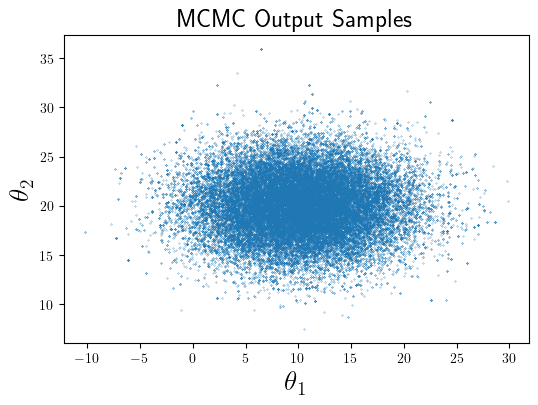

0.50704


In [5]:
fig = plt.figure(figsize=(6, 4))
plt.scatter(samples[0, :], samples[1, :], s=0.05)
plt.xlabel(r'$\theta_1$', fontsize = 18)
plt.ylabel(r'$\theta_2$', fontsize = 18)
plt.show()
print(a/nsteps)

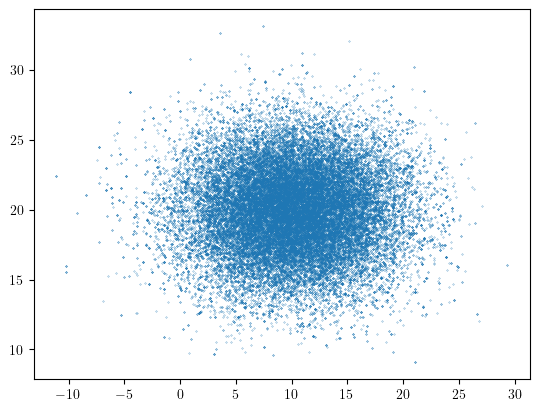

In [7]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

def L(x1, x2):
    return np.exp(-(x1-10)**2/50-(x2-20)**2/18)

nwalkers = 100
ndim = 2
nsteps = 500
burnin = 100
dev = 4.2

samples = np.empty((nwalkers, ndim, nsteps))
samples[:, :, 0] = random.normal(0, dev, (nwalkers, ndim))

for i in range(burnin+1):
    prop = samples[:, :, i] + random.normal(0, dev, (nwalkers, ndim))
    alpha = L(prop[:, 0], prop[:, 1])/L(samples[:, 0, i], samples[:, 1, i])
    idx = alpha>random.uniform(0, 1, nwalkers)
    samples[idx, :, i+1] = prop[idx, :]
    samples[np.logical_not(idx), :, i+1] = samples[np.logical_not(idx), :, i]

samples[:, :, 0] = samples[:, :, burnin+1]

for i in range(nsteps-1):
    prop = samples[:, :, i] + random.normal(0, dev, (nwalkers, ndim))
    alpha = L(prop[:, 0], prop[:, 1])/L(samples[:, 0, i], samples[:, 1, i])
    idx = alpha>random.uniform(0, 1, nwalkers)
    samples[idx, :, i+1] = prop[idx, :]
    samples[np.logical_not(idx), :, i+1] = samples[np.logical_not(idx), :, i]


plt.scatter(samples[:, 0, :], samples[:, 1, :], s=0.05)
plt.show()